In [1]:
import math
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [15]:
Terrordata = pd.read_csv(r"C:\Users\ASUS GAMER\Dropbox\My PC (LAPTOP-NPAOFGG2)\Desktop\dsci\globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")


In [16]:
Terrordata.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [17]:
Terrordata.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [21]:
Terrordata.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [22]:
Terror=Terrordata[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [23]:
Terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [24]:
Terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [25]:
print("Country with the most attacks:",Terror['Country'].value_counts().idxmax())
print("City with the most attacks:",Terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",Terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",Terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",Terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",Terror['Group'].value_counts().index[1])
print("Most Attack Types:",Terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [26]:
pip install wordcloud


                                              0.0/151.4 kB ? eta -:--:--
     -------------------------------------- 151.4/151.4 kB 4.6 MB/s eta 0:00:00


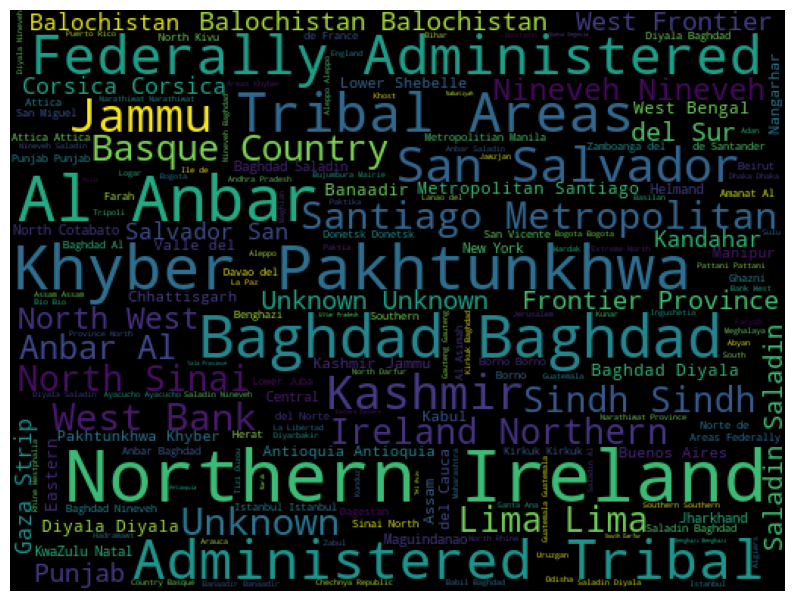

In [27]:
from wordcloud import WordCloud
from scipy import signal
cities = Terror.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [28]:
Terror.groupby('Year').size().sort_index()

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
dtype: int64

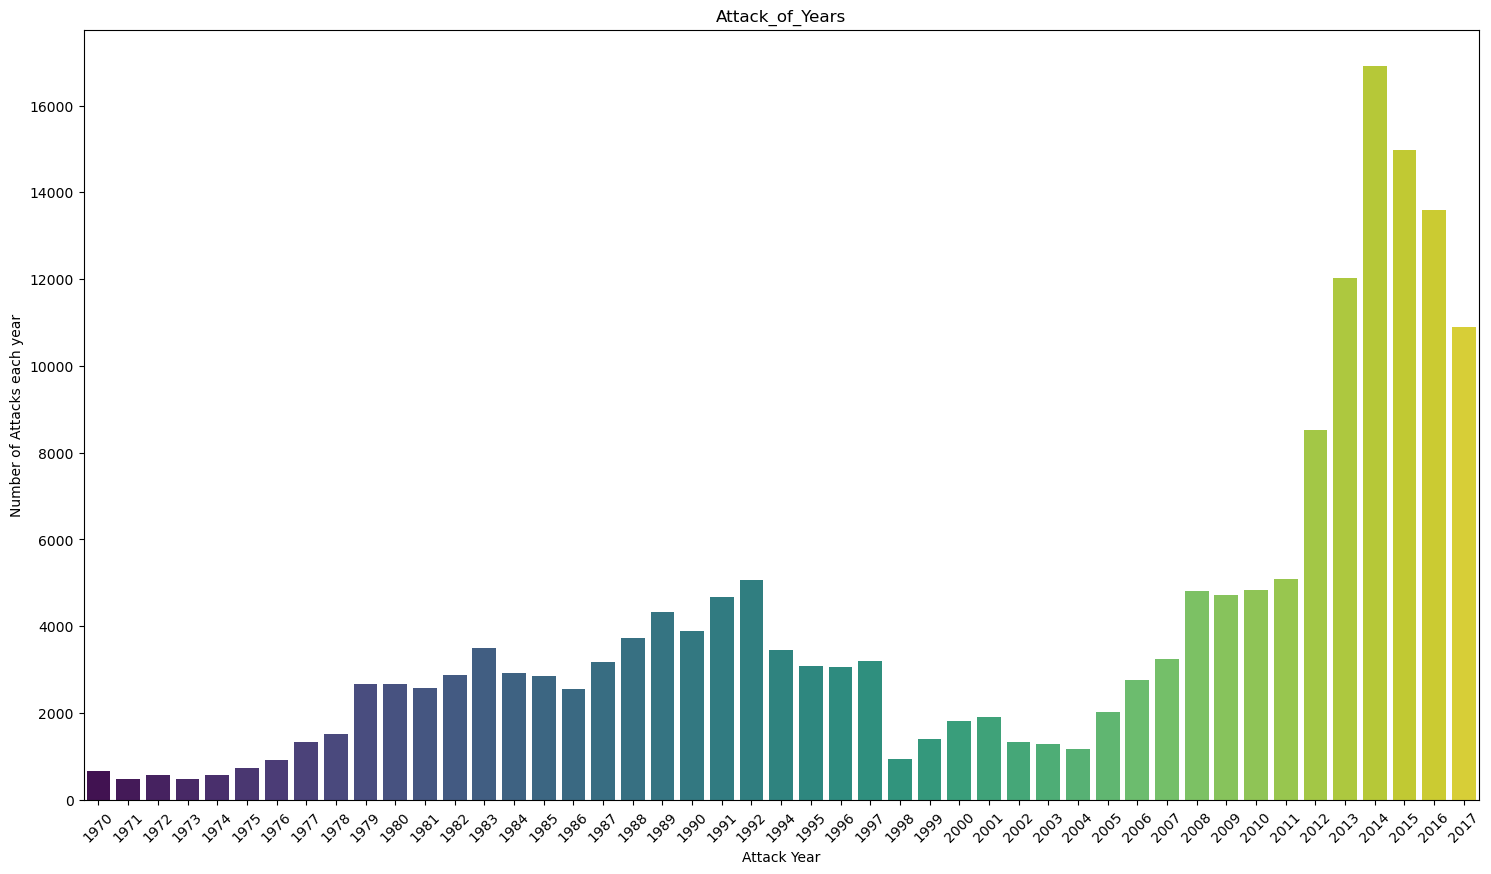

In [29]:
x_year = Terror['Year'].unique()
y_count_years = Terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'viridis')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

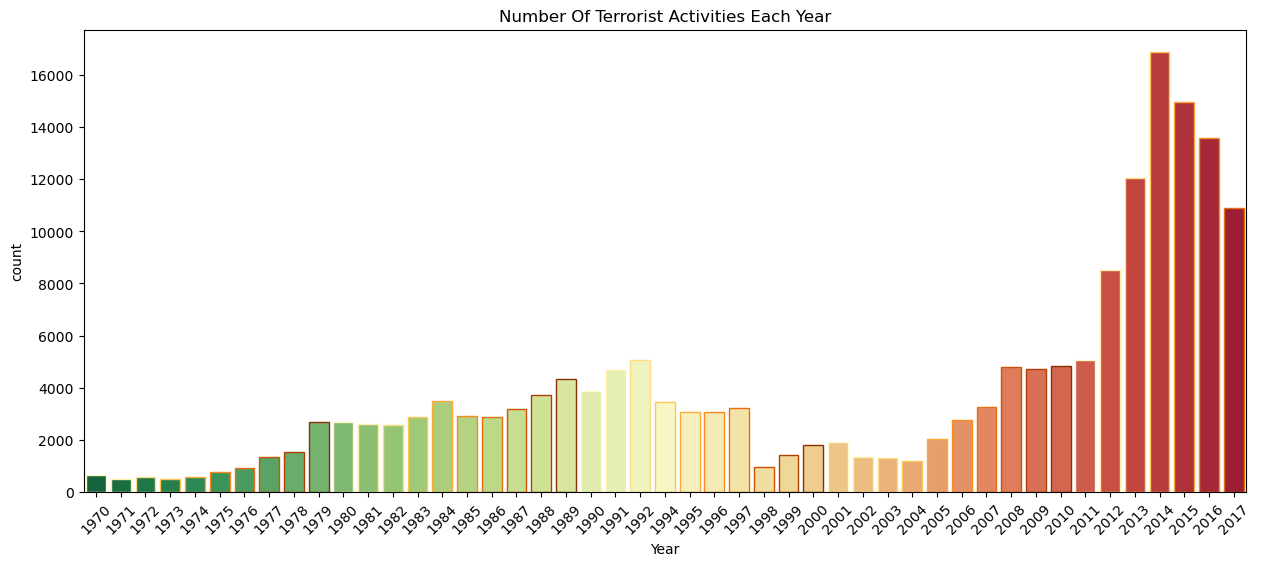

In [30]:
import seaborn as sns
figure = plt.figure(figsize=(15, 6))
sns.countplot(
    x='Year',                  
    data=Terror,                  
    palette='RdYlGn_r',          
    edgecolor=sns.color_palette("YlOrBr", 10) 
)
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

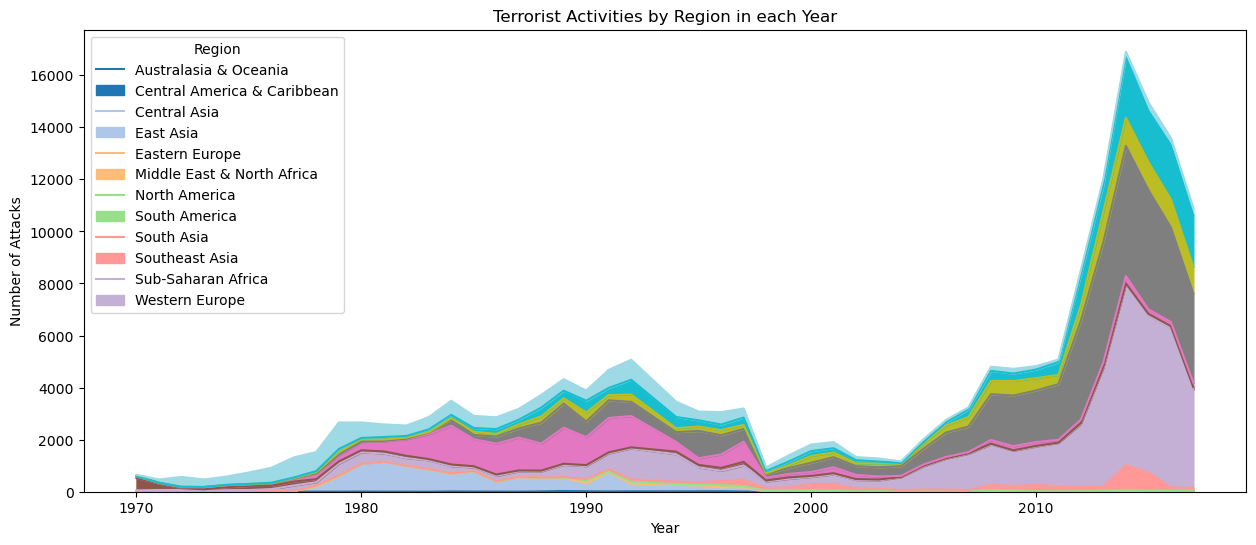

In [31]:
cross_tab = pd.crosstab(Terror.Year, Terror.Region)
regions = cross_tab.columns
colormap = plt.cm.get_cmap('tab20', len(regions))  
area_plot = cross_tab.plot(kind='area', figsize=(15, 6), colormap=colormap)
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Region', labels=regions)
plt.show()

In [32]:
Terror['Wounded'] = Terror['Wounded'].fillna(0).astype(int)
Terror['Killed'] = Terror['Killed'].fillna(0).astype(int)
Terror['casualties'] = Terror['Killed'] + Terror['Wounded']

In [33]:
Terrordata1 = Terror.sort_values(by='casualties',ascending=False)[:50]

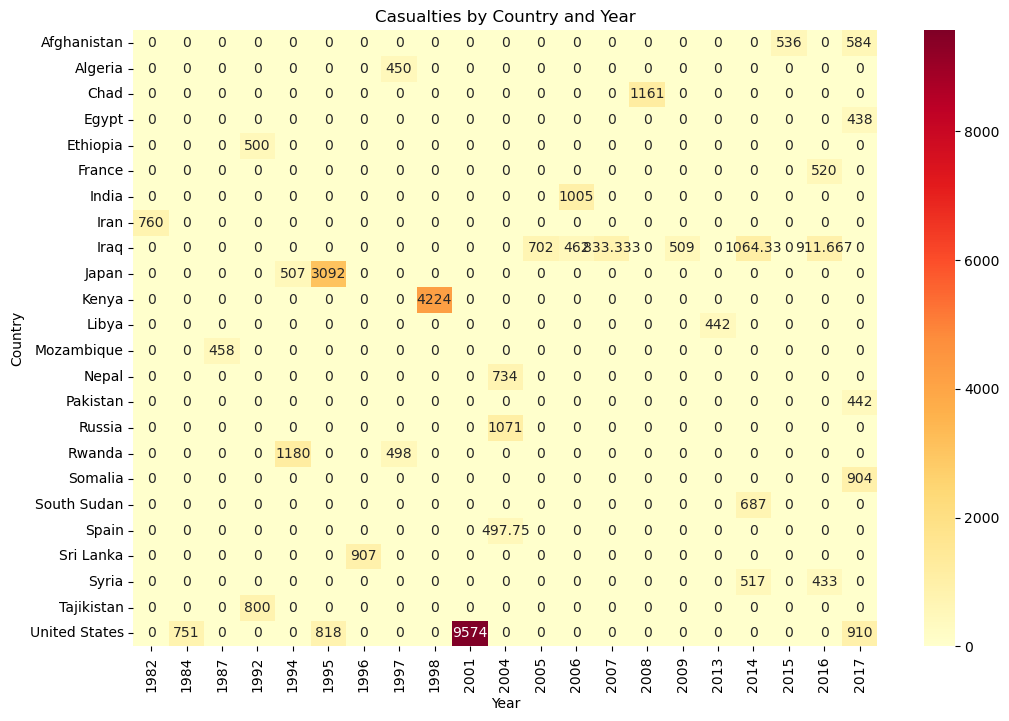

In [34]:
heat=Terrordata1.pivot_table(index='Country',columns='Year',values='casualties')
heat.fillna(0,inplace=True)
plt.figure(figsize=(12, 8))
sns.heatmap(heat, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Casualties by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

In [35]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#f7fbff'],[.5, '#3182bd'],[.5, '#fee090'],[1, '#e34a33']]  
heatmap = go.Heatmap(
    z=heat.values,            
    x=heat.columns,         
    y=heat.index,          
    colorscale=colorscale    
)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis=dict(ticks='', nticks=20),
    yaxis=dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap', show_link=False)

In [36]:
Terror.Country.value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

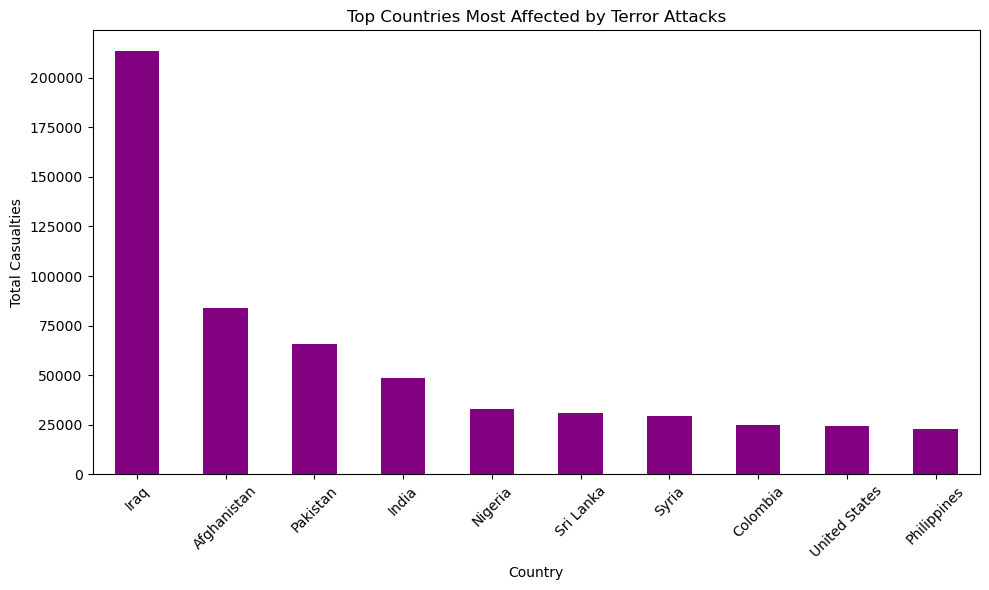

In [37]:
country_casualties = Terror.groupby('Country')['casualties'].sum()
top_countries = country_casualties.sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='purple')
plt.title('Top Countries Most Affected by Terror Attacks')
plt.xlabel('Country')
plt.ylabel('Total Casualties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()